In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, geom_line, aes, labs, theme_minimal, geom_boxplot, coord_flip
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [2]:
df = pd.read_csv('model_data.csv')
df['WINNER_cat'] = df['WINNER'].astype('category')
df.columns

Index(['Unnamed: 0', 'GAME_ID', 'TEAM_NAME', 'PTS', 'WINNER',
       'DEFLECTIONS_RATIO', 'DEFLECTIONS_DIFF', 'CONTEST_RATE',
       'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'CHARGES_DIFF',
       'SCREEN_AST_RATIO', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_RATIO',
       'SCREEN_AST_PTS_DIFF', 'LOOSE_RATIO', 'LOOSE_DIFFERENCE',
       'OFF_BOXOUT_RATIO', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_RATIO',
       'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_RATIO', 'BOXOUT_TM_RBS_DIFF',
       'WINNER_cat'],
      dtype='object')

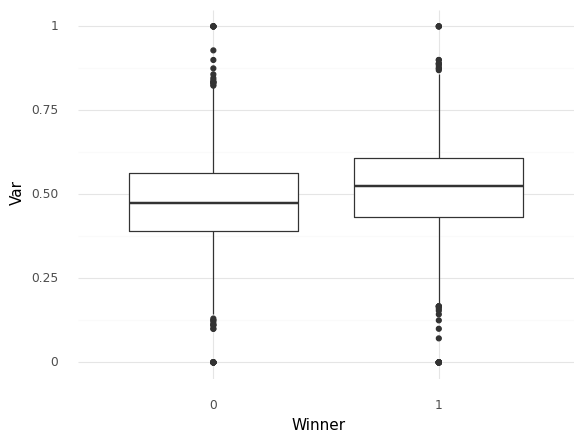

<ggplot: (8786576862313)>

In [3]:
(ggplot(df, aes('WINNER_cat', 'BOXOUT_TM_RBS_RATIO'))
 + geom_boxplot() + 
labs(x = "Winner", y = "Var") + 
theme_minimal())

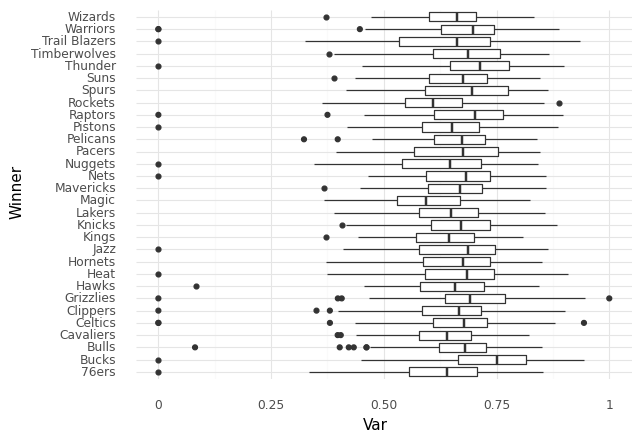

<ggplot: (8786584436989)>

In [4]:
(ggplot(df, aes('TEAM_NAME', 'CONTEST_RATE'))
 + geom_boxplot() + 
labs(x = "Winner", y = "Var") + 
theme_minimal() + 
coord_flip())

In [5]:
away = df.iloc[::2]
home = df.iloc[1::2]

In [6]:
y = away['WINNER'].values
X = away[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=858, test_size=.3)

In [8]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2', 'l1']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
lr = grid_search.fit(X_train, y_train)

# Predictions and predicted probabilities for training set
lr_away_train = lr.predict(X_train)
lr_away_train_prob = lr.predict_proba(X_train)[:,1]

# Predictions and predicted probabilities for test set
lr_away_test = lr.predict(X_test)
lr_away_test_prob = lr.predict_proba(X_test)[:,1]



In [9]:
def model_preds(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    solvers = ['newton-cg', 'lbfgs', 'liblinear']
    penalty = ['l2', 'l1']
    c_values = [100, 10, 1.0, 0.1, 0.01]
    # define grid search
    grid = dict(solver=solvers,penalty=penalty,C=c_values)
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy',error_score=0)
    lr = grid_search.fit(X_train, y_train)

    # Predictions and predicted probabilities for training set
    train_preds = lr.predict(X_train)
    train_prob = lr.predict_proba(X_train)[:,1]

    # Predictions and predicted probabilities for test set
    test_preds = lr.predict(X_test)
    test_prob = lr.predict_proba(X_test)[:,1]
    return train_preds, train_prob, test_preds, test_prob

In [10]:
away_ratio_train, away_ratio_train_p, away_ratio_test, away_ratio_test_p = model_preds(X_train, X_test, y_train, y_test)

In [11]:
print(metrics.classification_report(y_train, away_ratio_train))

              precision    recall  f1-score   support

           0       0.65      0.79      0.71       921
           1       0.61      0.44      0.51       696

    accuracy                           0.64      1617
   macro avg       0.63      0.62      0.61      1617
weighted avg       0.63      0.64      0.63      1617



In [12]:
print(metrics.classification_report(y_test, away_ratio_test))

              precision    recall  f1-score   support

           0       0.64      0.79      0.71       395
           1       0.60      0.40      0.48       298

    accuracy                           0.63       693
   macro avg       0.62      0.60      0.59       693
weighted avg       0.62      0.63      0.61       693



In [13]:
fpr_away_ratio, tpr_away_ratio, thresh = roc_curve(y_test, away_ratio_test_p)

In [14]:
X_diff = away[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values

X_train, X_test, y_train, y_test = train_test_split(X_diff, y, stratify=y, random_state=858, test_size=.3)

In [15]:
away_diff_train, away_diff_train_p, away_diff_test, away_diff_test_p = model_preds(X_train, X_test, y_train, y_test)

In [16]:
print(metrics.classification_report(y_train, away_diff_train))

              precision    recall  f1-score   support

           0       0.67      0.77      0.71       921
           1       0.62      0.50      0.55       696

    accuracy                           0.65      1617
   macro avg       0.64      0.63      0.63      1617
weighted avg       0.65      0.65      0.64      1617



In [17]:
print(metrics.classification_report(y_test, away_diff_test))

              precision    recall  f1-score   support

           0       0.63      0.73      0.68       395
           1       0.55      0.44      0.49       298

    accuracy                           0.60       693
   macro avg       0.59      0.58      0.58       693
weighted avg       0.60      0.60      0.60       693



In [18]:
fpr_away_diff, tpr_away_diff, thresh = roc_curve(y_test, away_diff_test_p)

In [19]:
y = home['WINNER'].values
X = home[['DEFLECTIONS_RATIO', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_RATIO', 'SCREEN_AST_RATIO', 'SCREEN_AST_PTS_RATIO', 'LOOSE_RATIO', 'OFF_BOXOUT_RATIO', 'DEF_BOXOUT_RATIO', 'BOXOUT_TM_RBS_RATIO']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=858, test_size=.3)

In [20]:
home_ratio_train, home_ratio_train_p, home_ratio_test, home_ratio_test_p = model_preds(X_train, X_test, y_train, y_test)

In [21]:
print(metrics.classification_report(y_train, home_ratio_train))

              precision    recall  f1-score   support

           0       0.60      0.42      0.50       696
           1       0.64      0.79      0.71       921

    accuracy                           0.63      1617
   macro avg       0.62      0.61      0.60      1617
weighted avg       0.63      0.63      0.62      1617



In [22]:
print(metrics.classification_report(y_test, home_ratio_test))

              precision    recall  f1-score   support

           0       0.62      0.45      0.52       298
           1       0.66      0.79      0.72       395

    accuracy                           0.64       693
   macro avg       0.64      0.62      0.62       693
weighted avg       0.64      0.64      0.63       693



In [23]:
fpr_home_ratio, tpr_home_ratio, thresh = roc_curve(y_test, home_ratio_test_p)

In [24]:
X_diff = home[['DEFLECTIONS_DIFF', 'CONTEST_RATE', 'CONTEST_RATE_2', 'CONTEST_RATE_3', 'CHARGES_DIFF', 'SCREEN_AST_DIFF', 'SCREEN_AST_PTS_DIFF', 'LOOSE_DIFFERENCE', 'OFF_BOXOUT_DIFF', 'DEF_BOXOUT_DIFF', 'BOXOUT_TM_RBS_DIFF']].values

X_train, X_test, y_train, y_test = train_test_split(X_diff, y, stratify=y, random_state=858, test_size=.3)

In [25]:
home_diff_train, home_diff_train_p, home_diff_test, home_diff_test_p = model_preds(X_train, X_test, y_train, y_test)

In [26]:
print(metrics.classification_report(y_train, home_diff_train))

              precision    recall  f1-score   support

           0       0.60      0.46      0.52       696
           1       0.65      0.77      0.71       921

    accuracy                           0.64      1617
   macro avg       0.63      0.61      0.61      1617
weighted avg       0.63      0.64      0.63      1617



In [27]:
print(metrics.classification_report(y_test, home_diff_test))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52       298
           1       0.65      0.76      0.70       395

    accuracy                           0.63       693
   macro avg       0.62      0.61      0.61       693
weighted avg       0.63      0.63      0.62       693



In [28]:
fpr_home_diff, tpr_home_diff, thresh = roc_curve(y_test, home_diff_test_p)

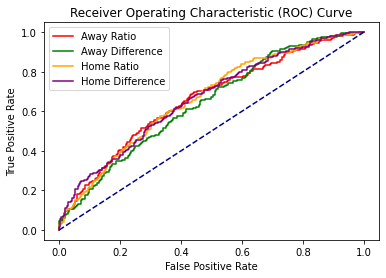

In [29]:
plt.plot(fpr_away_ratio, tpr_away_ratio, color='red',label='Away Ratio')
plt.plot(fpr_away_diff, tpr_away_diff, color = 'green', label = "Away Difference")
plt.plot(fpr_home_ratio, tpr_home_ratio, color='orange',label='Home Ratio')
plt.plot(fpr_home_diff, tpr_home_diff, color = 'purple', label = "Home Difference")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=0)